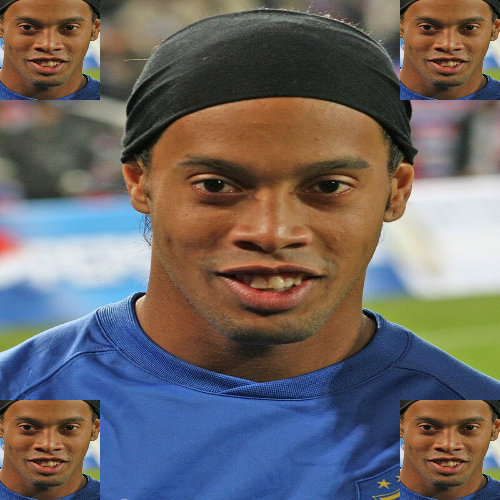

In [4]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

# Cargar el detector de rostros de dlib
detector = dlib.get_frontal_face_detector()

# Cargar la imagen
img = cv2.imread("/content/Ronaldinho.jpg")

# Redimensionar la imagen original a 500x500
img = cv2.resize(img, (500, 500))

# Detectar rostros en la imagen
rostros = detector(img, 1)

# Si se detectó al menos un rostro
if len(rostros) > 0:
    # Obtener las coordenadas del primer rostro detectado
    x, y, w, h = rostros[0].left(), rostros[0].top(), rostros[0].width(), rostros[0].height()

    # Recortar el rostro de la imagen
    rostro = img[y:y + h, x:x + w]

    # Redimensionar el rostro a un tamaño específico (por ejemplo, 100x100 píxeles)
    rostro = cv2.resize(rostro, (100, 100))

    # Coordenadas para las esquinas de la imagen principal
    esquinas = [(0, 0), (400, 0), (0, 400), (400, 400)]

    # Sobreponer el rostro en cada esquina
    for (x_offset, y_offset) in esquinas:
        img[y_offset:y_offset + 100, x_offset:x_offset + 100] = rostro

    # Mostrar la imagen resultante usando cv2_imshow
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    print("No se detectaron rostros en la imagen.")